In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#add english caterogty to items table

items_df = pd.read_csv('olist_products_dataset.csv')


items_df.drop(['product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

trans_df = pd.read_csv('product_category_name_translation.csv')

items_df = pd.merge(items_df, 
                      trans_df, 
                      on ='product_category_name', 
                      how ='inner')
items_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery


In [3]:
customers_orders_df = pd.read_csv('olist_orders_dataset.csv')
customers_orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
orders_df = pd.read_csv('olist_order_items_dataset.csv')
orders_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [5]:
#get only unique items in each order
orders = orders_df.groupby('order_id')['product_id'].unique()

In [6]:
#create edges between procuts in the same order
# create a 2d array [['node1','node2']] with duplicates

prodcut_edges = []

for order in orders:
    if len(order) > 1: 
        for i in range(len(order)):
            for j in range(i+1, len(order)):
                if order[i] != order[j]:
                    prodcut_edges.append([order[i], order[j]])
            
print(len(prodcut_edges))

4481


In [7]:
# Count duplicates deges and add wieghts

edge_with_wieght = []
dict1= {}

set_prodcut_edges = list(set(map(tuple,prodcut_edges)))

for _set in set_prodcut_edges:
    dict1[_set] = 1

for edge1 in prodcut_edges:
    for edge2 in prodcut_edges:
        reg = edge1[0] == edge2[0] and edge1[1] == edge2[1]
        not_reg = edge1[0] == edge2[1] and edge1[1] == edge2[0]
        if reg or not_reg:
            dict1[(edge1[0], edge1[1])] +=1
        
print(dict1)    

{('ff7a70b3356d433014b7d6957ed196cb', '6c706bd66d6df5b9eaa716699943efd0'): 2, ('a0f3c43b288de04ccb40d26cf26c639d', '93e6c730cc84ef7cfdd20cdfb2269144'): 2, ('d9ee0c2943c9663aef6a2bc0411cbc14', 'c857b96593773e940454e76efa8eabb3'): 2, ('31c1d1dfbb4b2730140b8bd9248bcd58', '8a443635fdf9759915c9be5be2e3b862'): 2, ('be0e6c61c2bcdd9a4d022ba67fd66189', 'acebea1efbaa063642166633d247aec7'): 2, ('b8a0d73b2a06e7910d9864dccdb0cda2', '9bb8ca338e5588c361e34eae02e8fad6'): 7, ('ac1fcaf7402bfbf019afdcce1a784ad4', '50046ff3c7e886839388c4532a5ba24f'): 2, ('6d68112743e7ed2de3932554b033f544', 'fde90f06296b26995fd0de6f16610d70'): 2, ('ed38e11473775cde0d65f698aa0a4d27', '7b83c11ac78f11bde67542beb12e8163'): 2, ('540de93b2ffb859f65596855505ad7a1', '24016cd8f7a556eaaf043552e23df9f4'): 2, ('22f80c8069aff9c90b22803e6aec51f5', '0ad48bfc4a5619823e2b0f24b3c0b11b'): 2, ('457d976782cfef787ee35098bc9e4624', 'a6e9ad7f801066f00bf59e348ec8f3d6'): 2, ('bb18d09a22b3b9bc474e0b1437302666', '867dda95bbba37fe56fa288449fa122f'): 2

In [8]:
#Save edges as csv file node1, node2, weight

with open('product_to_product.csv', 'w') as f:
    f.write(f'node1,node2,num_of_carts')
    f.write('\n')
    for key, val in dict1.items():
        f.write(f'{key[0]},{key[1]}, {val}')
        f.write('\n')

In [9]:
#load graph network

product_edges_df = pd.read_csv('product_to_product.csv')

g = nx.from_pandas_edgelist(product_edges_df, 'node1', 'node2', ['num_of_carts'])

print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')

Nodes: 4885
Edges: 4058


In [10]:
print(f'Number of connected components in the network: {nx.number_connected_components(g)}')

Number of connected components in the network: 1652


In [11]:
#get all connected components in the graph
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)

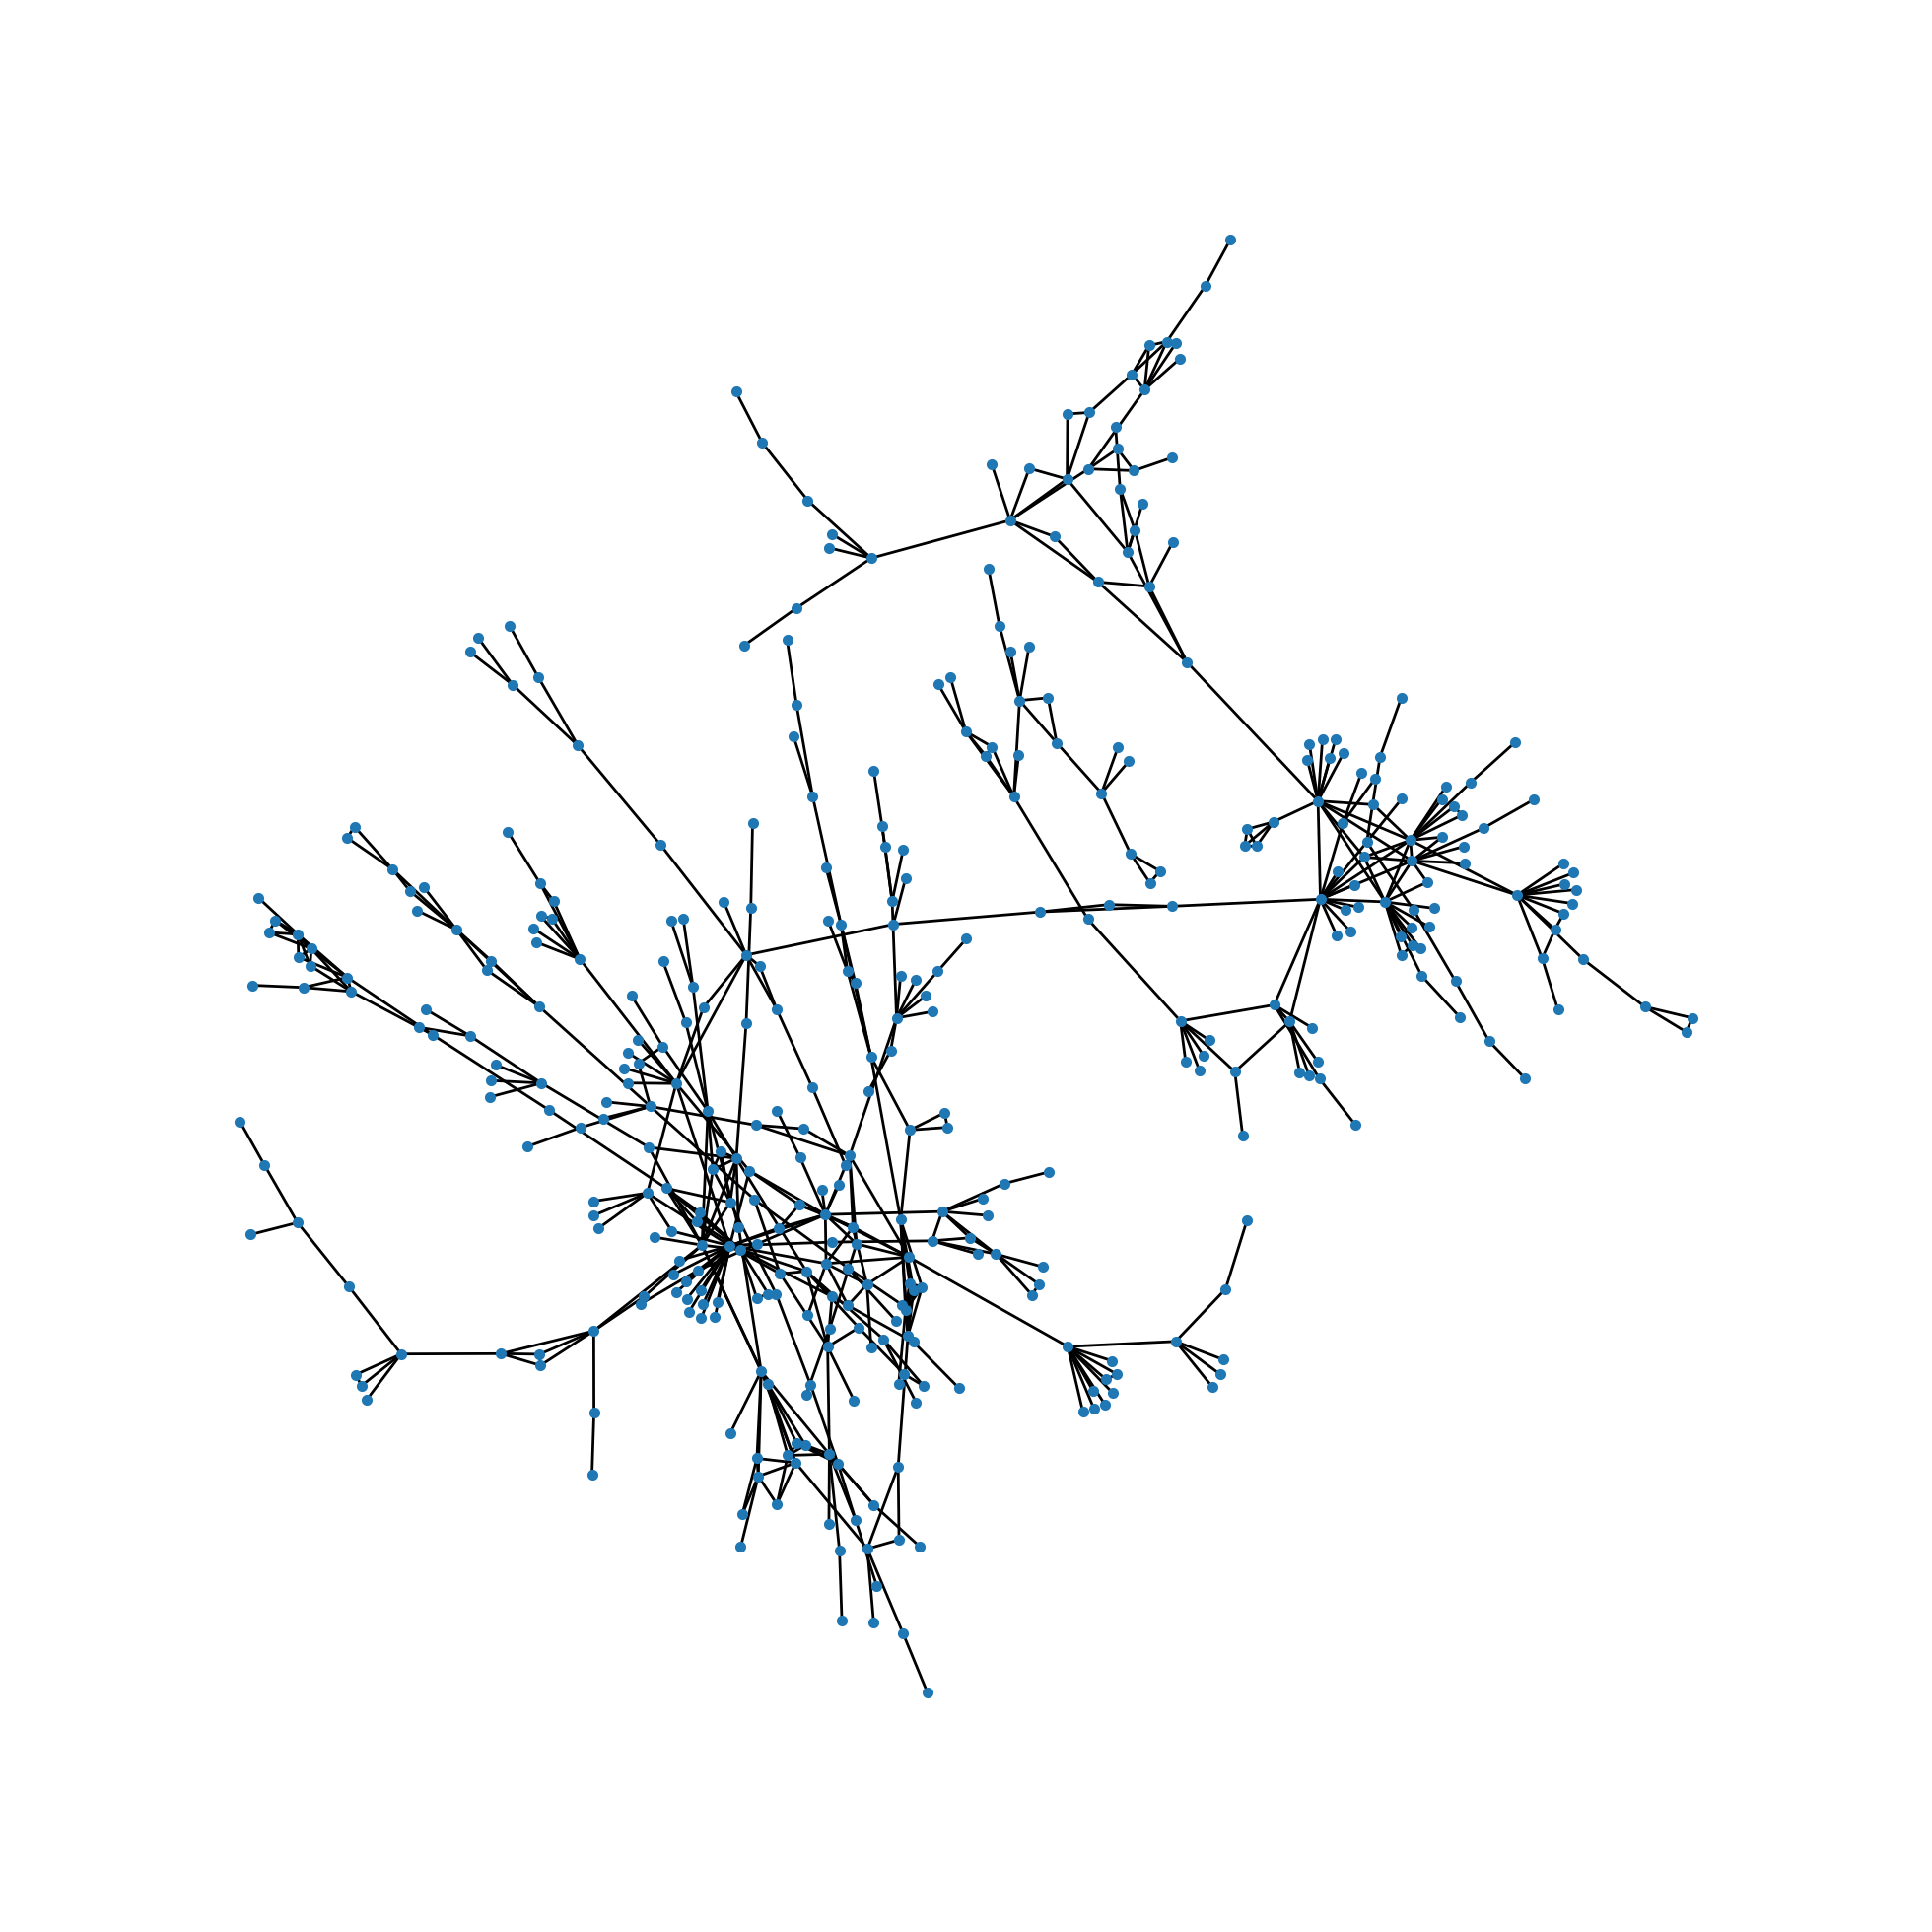

In [12]:
#draw greatest connected component in the network

plt.figure(num=None, figsize=(5, 5), dpi=400)
pos = nx.spring_layout(g.subgraph(Gcc[0])) # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g.subgraph(Gcc[0]), pos, node_size=1)

# edges
nx.draw_networkx_edges(g.subgraph(Gcc[0]), pos, width=0.5)


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [13]:
#betweens centrality in the GCC of the graph - ignore the edges weights
nx.betweenness_centrality(g.subgraph(Gcc[0]))

{'399f54c06661d06ca45c6e24ed238e0e': 0.0,
 'a6be3b3eaae040735e86e4376ea77515': 0.0,
 '120fa011365fc39efe382cba4e50999e': 0.03964073989262906,
 'd75ee8bd2f182827d5a26a09ed584c9a': 0.0,
 'b66270a5d5b3a8585f8314b2f14420fb': 0.010050123400249345,
 '4b7528d093f5acaec2a072366a4106bc': 0.0,
 '073afdaeb2d71d4da3ce0c6935614289': 0.005037783375314861,
 'e034c021254ff4d8da4e936e047967af': 0.0,
 '8273821fd2a32fbbc77ad8b743b2a1b9': 0.0,
 'f05901e010ebaa3924276751a35e6004': 0.005037783375314861,
 '8ced2631a18d2e0814557875b3bb907b': 0.0,
 '1c55a8be0613dd888ed9c039cea3d660': 0.010050123400249345,
 'feb4ade62e32b8d74c6f69f635057964': 0.0,
 'da7da0c2d3f2dbb32bee4ad3cf467fc6': 0.0,
 'cec09725da5ed01471d9a505e7389d37': 0.03490827672187874,
 '9bdc5ff7cc2ec4a654f101b764b293c1': 0.0,
 '8814a3da37fb9673a5ac06f82a2a00a9': 0.005037783375314861,
 'd678178aa4291cd25a755a90188375c8': 0.09242297025672341,
 'e9ba3ec00ccd563b43e5de69a74a43d7': 0.0,
 'c321936f167cdd14866ac591eea36f38': 0.0,
 '0a9a9c25c5a06532d1766e00d

In [14]:
#betweens centrality in the GCC of the graph - use the edges weights
nx.betweenness_centrality(g.subgraph(Gcc[0]), weight='num_of_carts')

{'399f54c06661d06ca45c6e24ed238e0e': 0.0,
 'a6be3b3eaae040735e86e4376ea77515': 0.0,
 '120fa011365fc39efe382cba4e50999e': 0.0395601692830912,
 'd75ee8bd2f182827d5a26a09ed584c9a': 0.0,
 'b66270a5d5b3a8585f8314b2f14420fb': 0.010050123400249345,
 '4b7528d093f5acaec2a072366a4106bc': 0.0,
 '073afdaeb2d71d4da3ce0c6935614289': 0.005037783375314861,
 'e034c021254ff4d8da4e936e047967af': 0.0,
 '8273821fd2a32fbbc77ad8b743b2a1b9': 0.0,
 'f05901e010ebaa3924276751a35e6004': 0.005945262872215014,
 '8ced2631a18d2e0814557875b3bb907b': 0.0,
 '1c55a8be0613dd888ed9c039cea3d660': 0.010050123400249345,
 'feb4ade62e32b8d74c6f69f635057964': 0.0,
 'da7da0c2d3f2dbb32bee4ad3cf467fc6': 0.0,
 'cec09725da5ed01471d9a505e7389d37': 0.03490827672187874,
 '9bdc5ff7cc2ec4a654f101b764b293c1': 0.0,
 '8814a3da37fb9673a5ac06f82a2a00a9': 0.005037783375314861,
 'd678178aa4291cd25a755a90188375c8': 0.09242297025672341,
 'e9ba3ec00ccd563b43e5de69a74a43d7': 0.0,
 'c321936f167cdd14866ac591eea36f38': 0.0,
 '0a9a9c25c5a06532d1766e00db

In [15]:
#calculate communities by girvan newman
communities_generator = nx.community.girvan_newman(g.subgraph(Gcc[0]))
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
girvan_newman_comm = sorted(map(sorted, next_level_communities),key=len, reverse=True)

print(f'Num of communities: {girvan_newman_comm}')

Num of communities: [['0615dcf981da53a5ca8777cd6a80361b', '066cc58255ee9ccb3e6da9d3edd02a7e', '06ecc3d4006ad6eb293a1b93ec3c7183', '08056d78bb75ed3ace107c72c16ec511', '09b0d15a8cc9a84e7af7e0225f67dc45', '0b13080e2bf193c4ff096b09e0758c7d', '0bcc3eeca39e1064258aa1e932269894', '0fbf220f61720a67fc0d6432cb32a5b4', '120fa011365fc39efe382cba4e50999e', '14081f2d6a3ce46cfa9d852c9b1b92ba', '181ce2dfd0a0d91969baabcb6df39bb9', '1b7ce992a80ac036dd9ab73d08289712', '1ba4e3fe92f16fd5a8942f7b7d804b52', '1c55a8be0613dd888ed9c039cea3d660', '1ebde342c905182ffc07333fc569c590', '27c0cea4dc76549f5bd124d9cad0ae3b', '281a67fd770c975ee1a7c842468fb3b5', '2ae5ed1d99afbb14a8b24041a81df16b', '2b10e945dae5434075c8bb2be0d17325', '2b939dc9b176d7fa21594d588815d4a4', '2ef36e1cae01b86d0ff0a2f50ff2bd53', '2ff995aead9c63a1f37a07b3664ead37', '322083bacc83416f56c4110e0216c2e1', '349ce46a0e2e20054aa9d80c48af8816', '368c6c730842d78016ad823897a372db', '372645c7439f9661fbbacfd129aa92ec', '3773a3773f5978591cff7b3e614989b3', '386ee

In [16]:
#calculate communities by girvan newman
louvain_comm = nx.community.louvain_communities(g.subgraph(Gcc[0]), weight='num_of_carts')

print(f'Num of communities: {louvain_comm}')

Num of communities: [{'5f94420195fe54db4e88348ee7a0f2f2', '10dbe0fbaa2c505123c17fdc34a63c56', '12cabe5229bf1f037e257f645f04caa4', '64fb265487de2238627ce43fe8a67efc', '12a3f3a8ef6c5e3c29c88e670fd61ee9', '84f456958365164420cfc80fbe4c7fab', '393564b0bcdda0d8c4ada9d780ebcebe', 'c321936f167cdd14866ac591eea36f38', 'ebf7d9b8166c02eb72e573eebd630458', 'cc4b51ca9b5ca05b7fd5337bddb7341c', '0d146484c69d613fe015c0229056b065', '18796df281656da4036dd926561a6030', '9adebd80969a5b8ec766fd02afffec2e'}, {'cd3de1984e1a77b441e1b39b8e334330', '056d012d264624accb7f73d31caee034', '9a8200a7f3448bfb18683080c03b54b1', '4d38e93bf8056fbb01a32e72f0257df8', '4f88323d03ffaf090b8fb0116b33c95e', '2827ebfb043a328a13a06ca9165cad0a', '146fed9eb1d0f9db43dad0c7c96fc6e8', '3e5201fe0d1ba474d9b90152c83c706c', '2481a472d98c582b46bc2dfeae6f539f', 'c0293bb52f87cea29cbf4cfa3fa873bc', '9ad75bd7267e5c724cb42c71ac56ca72', '8814a3da37fb9673a5ac06f82a2a00a9', '7a0f37fda63d1cd7dac2451494eb6e69', '52b668edc0d0c20cd9319bfda4019597', '592

In [17]:
girvan_newman_mod = nx.community.modularity(g.subgraph(Gcc[0]), girvan_newman_comm)
louvain_mod = nx.community.modularity(g.subgraph(Gcc[0]), louvain_comm)

print(f'Modularity by girvan newman communities: {girvan_newman_mod}')
print(f'Modularity by louvain communities: {louvain_mod}')

Modularity by girvan newman communities: 0.642267673078484
Modularity by louvain communities: 0.8660855450044639


<h6>We choose the communities partitions by louvain, because the modularity score is better</h6>

In [18]:
# comm = sorted( comm, key=len, reverse=True )

print(f'******* Total {len(louvain_comm)} communities ***********')
print('\n')
print('\n')

for com in louvain_comm:
    print(f"******** Community Size: {len(com)} **********")
    print(items_df.loc[items_df['product_id'].isin(com)]['product_category_name_english'].value_counts())
    print(f"************************************")
    print('\n')
    print('\n')

******* Total 21 communities ***********




******** Community Size: 13 **********
bed_bath_table     10
furniture_decor     1
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 21 **********
bed_bath_table     15
furniture_decor     5
home_confort        1
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 4 **********
baby    4
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 20 **********
furniture_decor          14
furniture_living_room     4
baby                      1
bed_bath_table            1
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 26 **********
bed_bath_table           21
furniture_decor           3
office_furniture          1
furniture_living_room     1
Name: product_category_name_english, dtype: int64
***

In [19]:
#betweenes centraliti inside specific community
nx.betweenness_centrality(g.subgraph(louvain_comm[0]), weight='num_of_carts')

{'5f94420195fe54db4e88348ee7a0f2f2': 0.0,
 '10dbe0fbaa2c505123c17fdc34a63c56': 0.0,
 '12cabe5229bf1f037e257f645f04caa4': 0.0,
 '12a3f3a8ef6c5e3c29c88e670fd61ee9': 0.0,
 '64fb265487de2238627ce43fe8a67efc': 0.4393939393939394,
 '84f456958365164420cfc80fbe4c7fab': 0.5606060606060607,
 '393564b0bcdda0d8c4ada9d780ebcebe': 0.0,
 'c321936f167cdd14866ac591eea36f38': 0.0,
 'ebf7d9b8166c02eb72e573eebd630458': 0.0,
 'cc4b51ca9b5ca05b7fd5337bddb7341c': 0.15151515151515152,
 '0d146484c69d613fe015c0229056b065': 0.16666666666666669,
 '18796df281656da4036dd926561a6030': 0.4696969696969697,
 '9adebd80969a5b8ec766fd02afffec2e': 0.0}